# Plateau angle simulation
## Goal
The goal of this part is to create a simulation of the relationship between inputs and the motor angles. To do so, a neural network will be trained, using pytorch, in order to simulate the system.

## External imports

In [18]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib
import matplotlib.pyplot as plt

from torch.autograd import Variable

%matplotlib inline

## Internal imports

In [19]:
from src import *

## Data preparation

In this part, the recorded data are loaded and prepared. The goal is to train the neural network on those datas.

In [20]:
dt = 0.007

In [21]:
name_list = os.listdir('src/data/train')
datas = [pd.read_csv('src/data/train/{}'.format(x)) for x in name_list]

Data visualisation

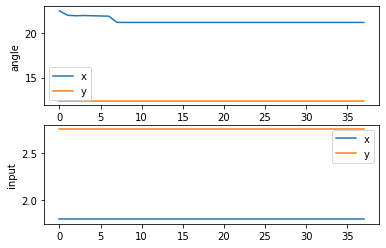

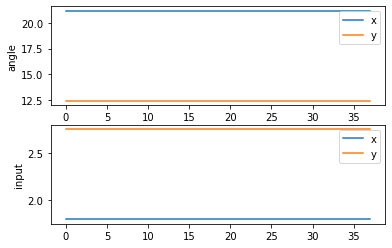

In [22]:
for data in datas:
    fig, axs = plt.subplots(2, 1)
    
    axs[0].plot(data['angle_x'], label='x')
    axs[0].plot(data['angle_y'], label='y')
    axs[0].set_ylabel('angle')
    axs[0].legend()
    
    axs[1].plot(data['input_x'], label='x')
    axs[1].plot(data['input_y'], label='y')
    axs[1].set_ylabel('input')
    axs[1].legend()

The input of the NN will be the inputs and speed. Thus, it is computed for each dataset.

The prediction of the neural network will be the speed to the next timestep.

All datasets are concatened and shuffled in order to have no-biased gradients during the training

In [23]:
for data in datas:
    data['d_angle_x'] = (data['angle_x'] - data['angle_x'].shift(1)) / dt
    data['d_angle_y'] = (data['angle_y'] - data['angle_y'].shift(1)) / dt
    data['target_x'] = data['d_angle_x'].shift(-1)
    data['target_y'] = data['d_angle_y'].shift(-1)
    
    data.dropna(inplace=True)
    
data = datas[0]
for df in datas[1:]:
    data.append(df)
data = data.sample(frac=1)
data.reset_index(inplace=True)

In [24]:
data.head()

,index,x,y,angle_x,angle_y,input_x,input_y,d_angle_x,d_angle_y,target_x,target_y
0,24,0.2,0.1,21.2,12.4,1.8,2.75,0.0,0.0,0.0,0.0
1,33,0.2,0.1,21.2,12.4,1.8,2.75,0.0,0.0,0.0,0.0
2,34,0.2,0.1,21.2,12.4,1.8,2.75,0.0,0.0,0.0,0.0
3,15,0.2,0.1,21.2,12.4,1.8,2.75,0.0,0.0,0.0,0.0
4,12,0.2,0.1,21.2,12.4,1.8,2.75,0.0,0.0,0.0,0.0


Finally, the inputs and targets are converted into pytorch format

In [38]:
x, y = Variable(torch.from_numpy(data[['d_angle_x', 'd_angle_y']].to_numpy()).type(torch.FloatTensor)), Variable(torch.from_numpy(data[['target_x', 'target_y']].to_numpy()).type(torch.FloatTensor))

# Neural network training
In this section, multiples NN are created and trained to model the system

In [39]:
nets = [PlateauNet0Hidden(2,2), PlateauNet1Hidden(2, 2, 2), PlateauNet1Hidden(2, 3, 2), PlateauNet1Hidden(2, 4, 2), 
        PlateauNet1Hidden(2, 8, 2), PlateauNet2Hidden(2, 4, 3, 2), PlateauNet2Hidden(2, 5, 3, 2),
       PlateauNet2Hidden(2, 6, 3, 2), PlateauNet2Hidden(2, 8, 4, 2), PlateauNet2Hidden(2, 12, 7, 2)]

In [40]:
nets[0](x)

tensor([[-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [ 4.3455, -0.3342],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [ 1.8800, -0.0942],
        [-0.5855,  0.1459],
        [ 1.8800, -0.0942],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [48.7242, -4.6545],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [ 1.8800, -0.0942],
        [-3.0510,  0.3859],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [68.4481, -6.5747],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0.1459],
        [-0.5855,  0